In [1]:
#Importing libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
import random as rn

In [4]:
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [5]:
#lilly
#orchid
#lotus
#sunflower
#tulip
IMG_SIZE = 150
X = []
Z = []
path_lilly = "test_set/lilly"
path_orchid = "test_set/orchid"
path_lotus = "test_set/lotus"
path_sunflower = "test_set/sunflower"
path_tulip = "test_set/tulip"

In [6]:
#returneaza tipul florii in functie de nume: tulip, orchid, lilly, sunflower, lotus
def assign_label(img,flower_type):
    return flower_type

In [7]:
def make_train_data(flower_type,DIR):
    #pt fiecare img din directoare
    for img in tqdm(os.listdir(DIR)):
        #asignam tipul
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        #se citeste imaginea si face resize
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        #pastram 2 vectori : X pentru imagini si Z pt label
        X.append(np.array(img))
        Z.append(str(label))

In [8]:
make_train_data('lilly',path_lilly)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 136.70it/s]

1000


In [9]:
make_train_data('orchid',path_orchid)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 167.28it/s]

2000


In [10]:
make_train_data('lotus',path_lotus)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.52it/s]

3000


In [11]:
make_train_data('sunflower',path_sunflower)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 153.53it/s]

4000


In [12]:
make_train_data('tulip',path_tulip)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 140.77it/s]

5000


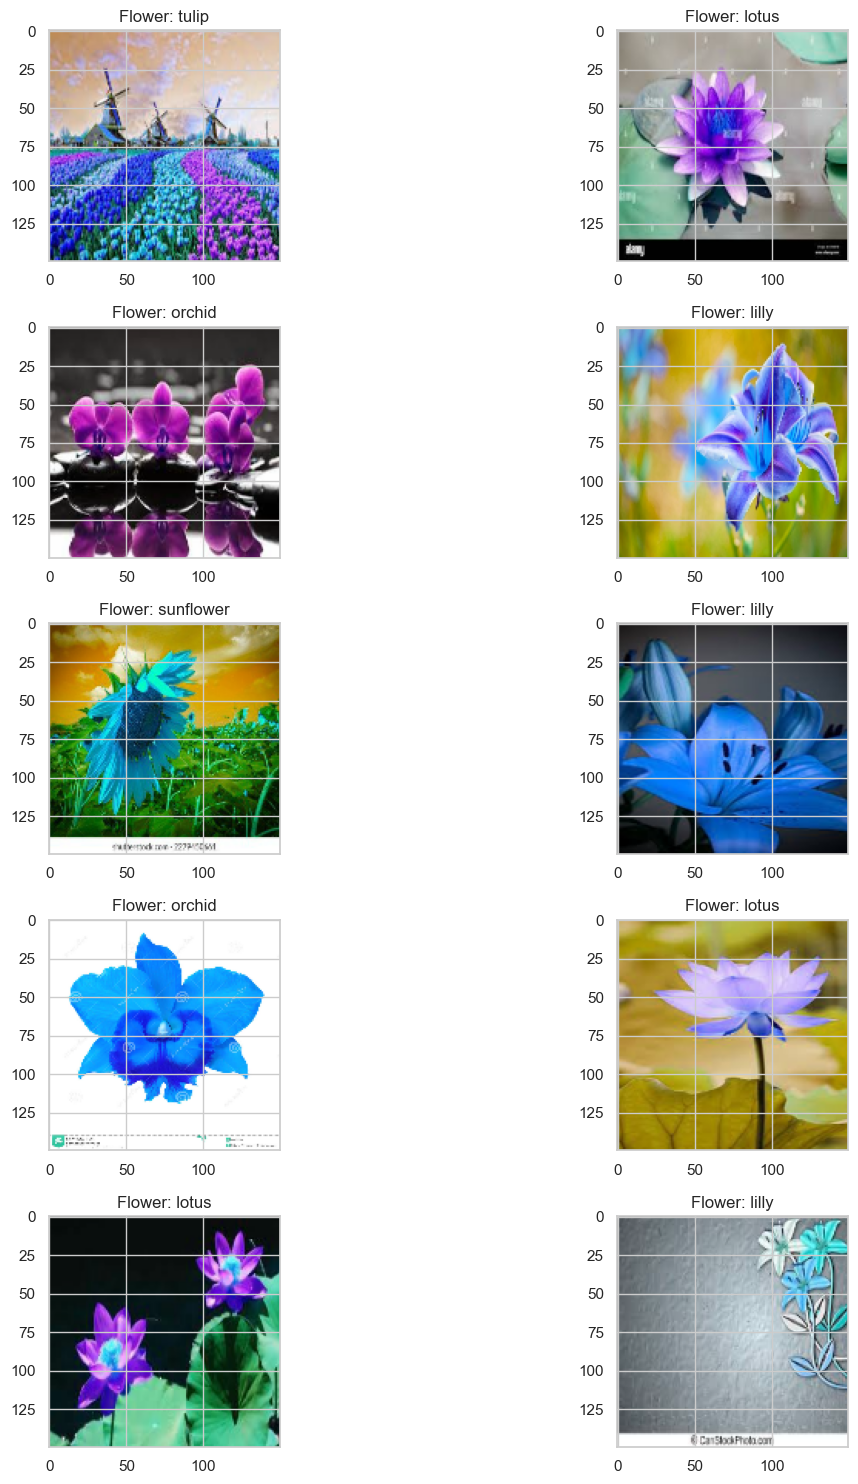

In [13]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [14]:
#Data Processing

In [15]:
##Training image processing

In [16]:
#Data Augmentation

In [17]:

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
training_set = train_datagen.flow_from_directory(
                    'training_set',
                    target_size = (64, 64),
                    batch_size = 32,
                    class_mode = 'categorical')

Found 3750 images belonging to 5 classes.


In [18]:
##Test image processing

In [19]:
test_datagen = ImageDataGenerator(
                    rescale = 1./255)
test_set = test_datagen.flow_from_directory(
                    'test_set',
                    target_size = (64, 64),
                    batch_size = 32,
                    class_mode = 'categorical')

Found 5000 images belonging to 5 classes.


In [20]:
#Building model

In [21]:
cnn = tf.keras.models.Sequential()

In [22]:
#Building convolution layer

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters = 64,
                              kernel_size = 3,
                              activation = 'relu',
                              input_shape = [64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,
                                 strides = 2))

C:\Users\40741\anaconda3\envs\env_si\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
cnn.add(tf.keras.layers.Conv2D(filters = 64,
                              kernel_size = 3,
                              activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,
                                 strides = 2))

In [25]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [26]:
cnn.add(tf.keras.layers.Flatten())

In [27]:
cnn.add(tf.keras.layers.Dense(units = 128,
                             activation = 'relu'))

In [28]:
cnn.add(tf.keras.layers.Dense(units = 5,
                             activation = 'softmax'))

In [29]:
cnn.compile(optimizer='rmsprop', 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

In [30]:
history = cnn.fit(x=training_set, validation_data=test_set, epochs=20)

Epoch 1/20


C:\Users\40741\anaconda3\envs\env_si\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 92s 702ms/step - accuracy: 0.3480 - loss: 1.6630 - val_accuracy: 0.5782 - val_loss: 1.0812
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 80s 667ms/step - accuracy: 0.5394 - loss: 1.1385 - val_accuracy: 0.6070 - val_loss: 1.0043
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 85s 707ms/step - accuracy: 0.5943 - loss: 1.0322 - val_accuracy: 0.6716 - val_loss: 0.8501
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 75s 622ms/step - accuracy: 0.6497 - loss: 0.9228 - val_accuracy: 0.6974 - val_loss: 0.7965
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 70s 576ms/step - accuracy: 0.6681 - loss: 0.8695 - val_accuracy: 0.7140 - val_loss: 0.7820
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 77s 643ms/step - accuracy: 0.6987 - loss: 0.7998 - val_accuracy: 0.7376 - val_loss: 0.6925
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 98s 823ms/step - accuracy: 0.7228 - loss: 0.7351 - val_accuracy: 0.7560 - val_loss: 0.6490
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 88s 736ms/step - accuracy: 0.7422 - loss: 0.6842 - val

In [31]:
#Preprocess new image

In [32]:
from keras.preprocessing import image
test_image = image.load_img('prediction/38.jpeg', 
                            target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, 
                            axis = 0)
result = cnn.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


In [33]:
training_set.class_indices

{'lilly': 0, 'lotus': 1, 'orchid': 2, 'sunflower': 3, 'tulip': 4}

In [34]:
print(result)

[[0. 0. 0. 0. 1.]]


In [35]:
if result[0][0] == 1:
    print('Lilly')
elif result[0][1] == 1:
    print('Lotus')
elif result[0][2] == 1:
    print('Orchid')
elif result[0][3] == 1:
    print('Sunflower')
elif result[0][4] == 1:
    print('Tulip')

Tulip


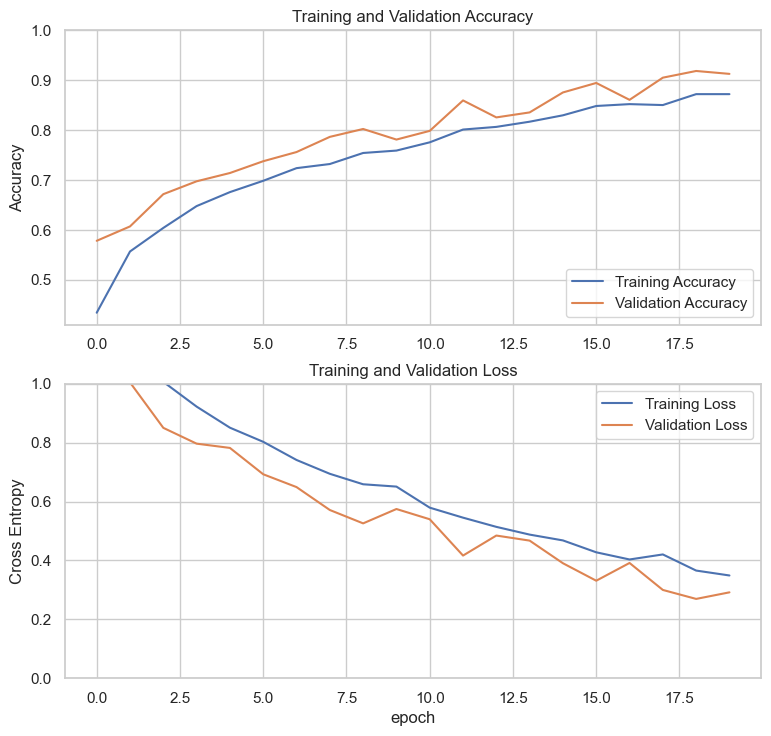

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


#Observam ca cut crestem numarul de epoci cu care antrenam modelul, cu atat creste si acuratetea si validarea iar pierderile scad